In [1]:
import shapely
import pandas as pd
import numpy as np

x_min = 0.2
x_max = 0.8
y_min = 0.1
y_max = 0.3


num_points = 5
num_polygons = 1000
polygons = pd.DataFrame()
for i in range(num_points):
    polygons[f'x_{i}']= np.zeros(num_polygons)
    polygons[f'y_{i}']= np.zeros(num_polygons)
polygons_geometries=[]

for i in range(num_polygons):
    is_valid = False
    while not is_valid:
        for j in range(num_points):
            polygons[f'x_{j}'][i] = np.random.uniform(x_min, x_max)
            polygons[f'y_{j}'][i] = np.random.uniform(y_min, y_max)
        polygon = shapely.geometry.Polygon(zip([polygons[f'x_{j}'][i] for j in range(num_points)], [polygons[f'y_{j}'][i] for j in range(num_points)]))
        is_valid = polygon.is_simple
    polygons_geometries.append(polygon)
polygons

,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4
0,0.542632,0.109934,0.316533,0.164828,0.369475,0.183662,0.484195,0.147686,0.528795,0.211192
1,0.676780,0.172556,0.679809,0.148014,0.412164,0.102655,0.749371,0.103910,0.768833,0.126375
2,0.736549,0.248603,0.611976,0.259628,0.238212,0.130479,0.351988,0.148506,0.646005,0.124242
3,0.554114,0.172875,0.633422,0.190879,0.400322,0.271302,0.294761,0.161918,0.765638,0.103298
4,0.334514,0.209762,0.323551,0.113906,0.762207,0.255220,0.503744,0.243000,0.734579,0.251665
...,...,...,...,...,...,...,...,...,...,...
995,0.381032,0.228054,0.409789,0.179400,0.224448,0.292693,0.278411,0.112771,0.697641,0.277517
996,0.786230,0.259267,0.716649,0.203415,0.536687,0.110248,0.210646,0.236623,0.757809,0.245616
997,0.629660,0.146455,0.434461,0.123717,0.219691,0.198105,0.490842,0.154759,0.747874,0.263548
998,0.345447,0.131372,0.226298,0.244258,0.395849,0.241363,0.510999,0.298912,0.496024,0.261169


In [5]:
col_order=[]
for i in range(num_points):
    col_order.append(f'x_{i}')
    col_order.append(f'y_{i}')
polygons[col_order].to_csv('polygons.csv', index=False)

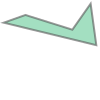

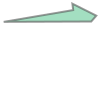

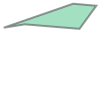

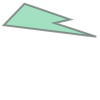

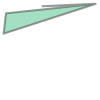

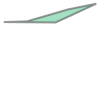

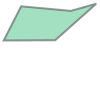

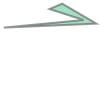

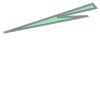

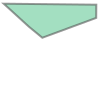

In [6]:
from IPython.display import display

for i in range(10):
    display(polygons_geometries[i])

In [16]:
p=polygons_geometries[0]
# get coordinates of the polygon
np.array(p.exterior.coords.xy)

array([[0.54263245, 0.31653332, 0.36947548, 0.48419461, 0.52879505,
        0.54263245],
       [0.10993373, 0.16482824, 0.18366171, 0.1476856 , 0.21119248,
        0.10993373]])

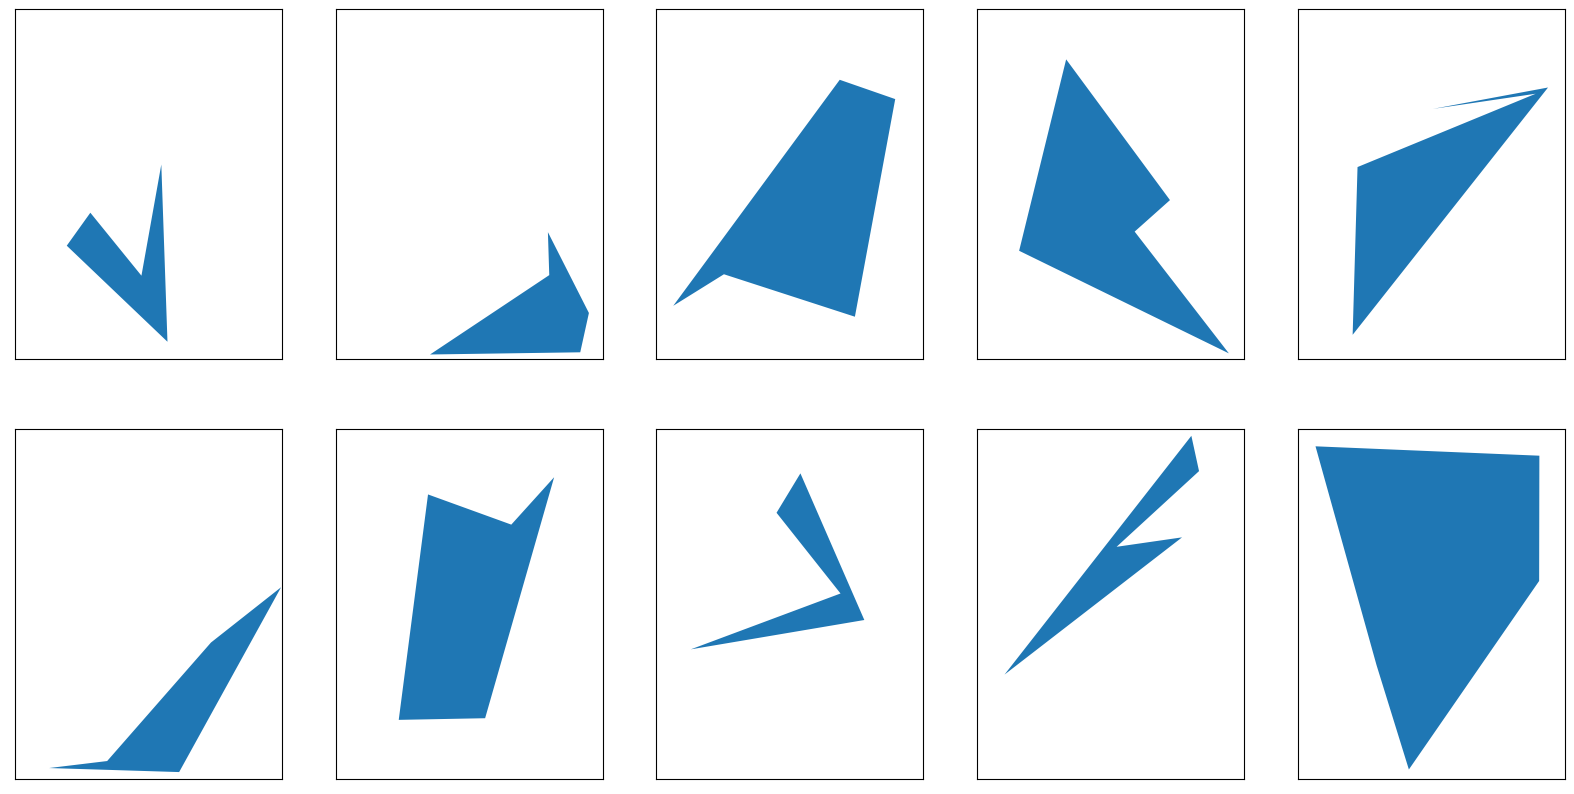

In [20]:
# plot 10 examples in a grid with matplotlib

import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i in range(10):
    ax = axs[i//5, i%5]
    ax.add_patch(patches.Polygon(np.array(polygons_geometries[i].exterior.coords), closed=True))
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    # remove ticks and numbers on the axes
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()